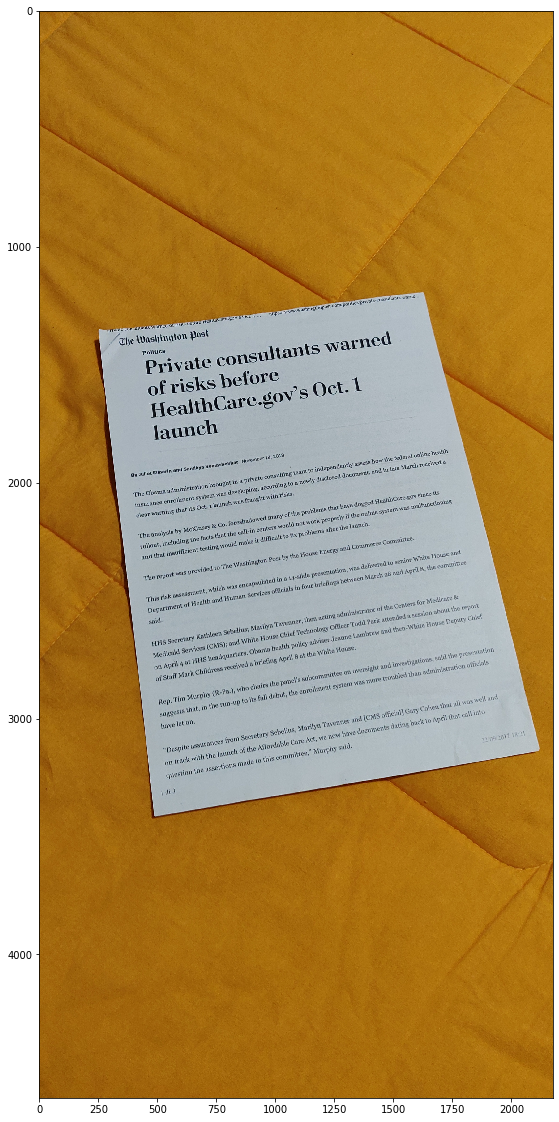

[]

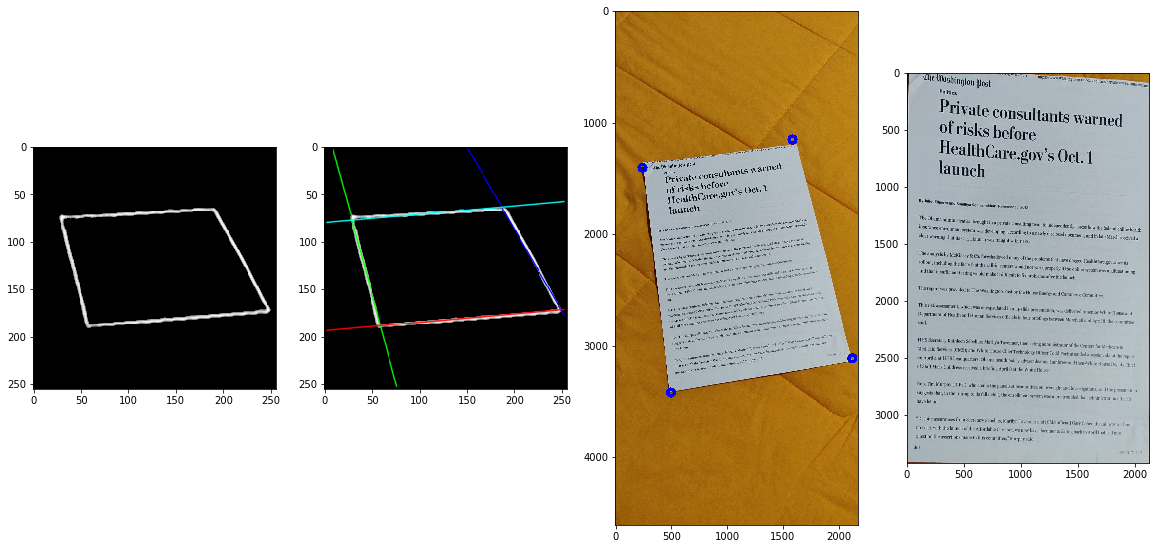

In [7]:
import koda
from matplotlib import pyplot as plt
import cv2
import numpy as np
import math
%matplotlib inline

plt.figure(figsize=(20,20))

# Read image
file = 'dataset/IMG_%d.jpg' % 6
img = cv2.imread(file, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Load image into koda engine
doc, imgs = koda.load(img)

# Show koda pipeline
fig, axes = plt.subplots(1, 4, figsize=(20, 20))
axes[0].imshow(cv2.cvtColor(imgs['edges'], cv2.COLOR_GRAY2RGB))
axes[1].imshow(cv2.cvtColor(imgs['hough_lines'], cv2.COLOR_BGR2RGB))
axes[2].imshow(cv2.cvtColor(imgs['corners'], cv2.COLOR_BGR2RGB))
axes[3].imshow(cv2.cvtColor(imgs['warp'], cv2.COLOR_BGR2RGB))
plt.plot()

Search for and


[]

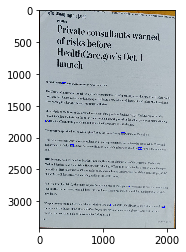

In [8]:
# Find text
word = "and"
print("Search for %s" % word)
highlight = doc.findWord(word)
plt.imshow(cv2.cvtColor(highlight, cv2.COLOR_BGR2RGB))
plt.plot()